In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


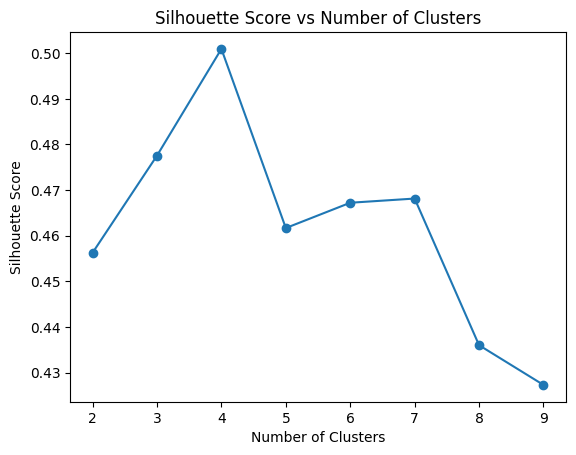

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('retail_sales_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
customer_summary = df.groupby('Customer ID').agg({
    'Gender': 'first',
    'Age': 'mean',
    'Total Amount': 'sum',
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Purchase Frequency'}).reset_index()

features = customer_summary[['Age', 'Total Amount', 'Purchase Frequency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

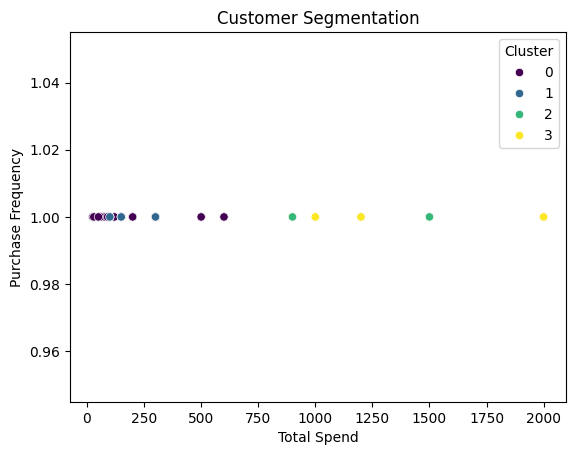

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)
sns.scatterplot(data=customer_summary, x='Total Amount', y='Purchase Frequency', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Purchase Frequency')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_features, customer_summary['Cluster'])
print(f'Silhouette Score for K=4: {score:.3f}')

Silhouette Score for K=4: 0.501
